<a href="https://colab.research.google.com/github/cluainin/BigDataProject/blob/main/Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup the Spark environment in Google Collab

In [ ]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and extract Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz
!pip install -q findspark

# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"
os.environ["PYSPARK_PYTHON"] = "python3"

# Find and initialize Spark
import findspark
findspark.init()

# Start a Spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder \
	    .master("local[*]") \
	    .appName("Spark_Colab") \
	    .getOrCreate()

# Test Spark session
spark.range(5).show()



+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+



2.	Setup a Spark Session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
	  .master("local")\
	  .appName("colab")\
	  .config('spark.ui.port', '4050')\
	  .getOrCreate()

spark


3.	Import the dataset ("CSV file from database table)

In [ ]:
# Read CSV file into DataFrame
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Print uploaded file name(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")



KeyboardInterrupt: 

4. Create a dataframe showing the data content

In [ ]:
# Install the pandas library

import pandas as pd

df = pd.read_csv('ProdLine300M01Stn9.csv')

# Display the dataframe

print(df)

             ID                    DateStamp  ProductProg  PID  \
0       3181924  2023-01-04 22:49:04.4830000        20561   38   
1       3181925  2023-01-04 22:49:34.1800000        20561    9   
2       3181926  2023-01-04 22:50:07.6230000        20561   29   
3       3181927  2023-01-04 22:50:44.3730000        20561   33   
4       3181928  2023-01-04 22:51:14.7070000        20561    7   
...         ...                          ...          ...  ...   
631392  3814085  2023-12-23 06:19:04.9000000        18499   32   
631393  3814086  2023-12-23 06:19:40.3270000        18499   10   
631394  3814087  2023-12-23 06:20:16.2530000        18499    3   
631395  3814088  2023-12-23 06:20:48.1270000        18499   19   
631396  3814089  2023-12-23 06:21:23.9170000        18499   17   

        MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  MotorContactOK_L_H1  \
0                        False                   False                False   
1                        False                   

Check the datatype of each column



In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                         int64
DateStamp                 object
ProductProg                int64
PID                        int64
MotorEngagementOK_L_H1      bool
                           ...  
NoiseReject_H4             int64
NoiseReject_H5             int64
NoiseReject_H6             int64
NoiseReject_H7             int64
NoiseReject_H8             int64
Length: 84, dtype: object


Change each of the boolean data types to 0 - False, 1 - True

DateStamp is an object data type and will be changed to datetime format

In [ ]:
#list all boolean columns

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)



Columns with boolean data type:
MotorEngagementOK_L_H1
MotorEngagementOK_R_H1
MotorContactOK_L_H1
MotorContactOK_R_H1
GearEngagementOK_L_H1
GearEngagementOK_R_H1
NoiseOK_H1
Result_H1
MotorEngagementOK_L_H2
MotorEngagementOK_R_H2
MotorContactOK_L_H2
MotorContactOK_R_H2
GearEngagementOK_L_H2
GearEngagementOK_R_H2
NoiseOK_H2
Result_H2
MotorEngagementOK_L_H3
MotorEngagementOK_R_H3
MotorContactOK_L_H3
MotorContactOK_R_H3
GearEngagementOK_L_H3
GearEngagementOK_R_H3
NoiseOK_H3
Result_H3
MotorEngagementOK_L_H4
MotorEngagementOK_R_H4
MotorContactOK_L_H4
MotorContactOK_R_H4
GearEngagementOK_L_H4
GearEngagementOK_R_H4
NoiseOK_H4
Result_H4
MotorEngagementOK_L_H5
MotorEngagementOK_R_H5
MotorContactOK_L_H5
MotorContactOK_R_H5
GearEngagementOK_L_H5
GearEngagementOK_R_H5
NoiseOK_H5
Result_H5
MotorEngagementOK_L_H6
MotorEngagementOK_R_H6
MotorContactOK_L_H6
MotorContactOK_R_H6
GearEngagementOK_L_H6
GearEngagementOK_R_H6
NoiseOK_H6
Result_H6
MotorEngagementOK_L_H7
MotorEngagementOK_R_H7
MotorContactOK_L

Convert all the above columns to integer data type

In [ ]:
#convert boolean data type to int

df[boolean_columns] = df[boolean_columns].astype(int)

print

#print dataframe after conversion

print(df)

             ID                    DateStamp  ProductProg  PID  \
0       3181924  2023-01-04 22:49:04.4830000        20561   38   
1       3181925  2023-01-04 22:49:34.1800000        20561    9   
2       3181926  2023-01-04 22:50:07.6230000        20561   29   
3       3181927  2023-01-04 22:50:44.3730000        20561   33   
4       3181928  2023-01-04 22:51:14.7070000        20561    7   
...         ...                          ...          ...  ...   
631392  3814085  2023-12-23 06:19:04.9000000        18499   32   
631393  3814086  2023-12-23 06:19:40.3270000        18499   10   
631394  3814087  2023-12-23 06:20:16.2530000        18499    3   
631395  3814088  2023-12-23 06:20:48.1270000        18499   19   
631396  3814089  2023-12-23 06:21:23.9170000        18499   17   

        MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  MotorContactOK_L_H1  \
0                            0                       0                    0   
1                            0                   

Check to make sure no boolean data type columns remain in dataframe

In [ ]:
#list all boolean columns after convert complete

boolean_columns = df.select_dtypes(include='bool').columns

#print columns with boolean data type

print("Columns with boolean data type:")

for col in boolean_columns:
  print(col)


Columns with boolean data type:


No further boolean data type columns in dataframe.

Next convert the DateStamp column to datetime

In [ ]:
df['DateStamp'] = pd.to_datetime(df['DateStamp'])

#check the dateframe after the conversion

print(df)

             ID               DateStamp  ProductProg  PID  \
0       3181924 2023-01-04 22:49:04.483        20561   38   
1       3181925 2023-01-04 22:49:34.180        20561    9   
2       3181926 2023-01-04 22:50:07.623        20561   29   
3       3181927 2023-01-04 22:50:44.373        20561   33   
4       3181928 2023-01-04 22:51:14.707        20561    7   
...         ...                     ...          ...  ...   
631392  3814085 2023-12-23 06:19:04.900        18499   32   
631393  3814086 2023-12-23 06:19:40.327        18499   10   
631394  3814087 2023-12-23 06:20:16.253        18499    3   
631395  3814088 2023-12-23 06:20:48.127        18499   19   
631396  3814089 2023-12-23 06:21:23.917        18499   17   

        MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  MotorContactOK_L_H1  \
0                            0                       0                    0   
1                            0                       0                    0   
2                            0

Check the data types again

In [ ]:
#Check the datatype of each column

column_datatypes = df.dtypes

#Print the data type for each column

print(column_datatypes)

ID                                 int64
DateStamp                 datetime64[ns]
ProductProg                        int64
PID                                int64
MotorEngagementOK_L_H1             int64
                               ...      
NoiseReject_H4                     int64
NoiseReject_H5                     int64
NoiseReject_H6                     int64
NoiseReject_H7                     int64
NoiseReject_H8                     int64
Length: 84, dtype: object


5. Preprocess the dataset

Check the dataset statistically

In [ ]:
description = df.describe()

#print the description

print(description)


                 ID                      DateStamp    ProductProg  \
count  6.313970e+05                         631397  631397.000000   
mean   3.497823e+06  2023-06-26 09:13:59.082977536   19694.401939   
min    3.181924e+06     2023-01-04 22:49:04.483000   16707.000000   
25%    3.339871e+06  2023-04-01 08:14:27.832999936   18499.000000   
50%    3.497751e+06     2023-06-24 02:23:48.220000   20547.000000   
75%    3.655716e+06     2023-09-19 09:46:11.060000   20553.000000   
max    3.814089e+06     2023-12-23 06:21:23.917000   22873.000000   
std    1.824274e+05                            NaN    1293.331268   

                 PID  MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  \
count  631397.000000           631397.000000           631397.000000   
mean       20.027775                0.022593                0.023362   
min         0.000000                0.000000                0.000000   
25%        10.000000                0.000000                0.000000   
50%        19.0000

Remove rows where the PID (Pallet ID) is equal to zero

In [ ]:
# Drop rows where PID equals zero False values

column_to_check = 'PID'

df = df[df[column_to_check] != 0]

#Check dataframe after dropping rows
print(df)

             ID               DateStamp  ProductProg  PID  \
0       3181924 2023-01-04 22:49:04.483        20561   38   
1       3181925 2023-01-04 22:49:34.180        20561    9   
2       3181926 2023-01-04 22:50:07.623        20561   29   
3       3181927 2023-01-04 22:50:44.373        20561   33   
4       3181928 2023-01-04 22:51:14.707        20561    7   
...         ...                     ...          ...  ...   
631392  3814085 2023-12-23 06:19:04.900        18499   32   
631393  3814086 2023-12-23 06:19:40.327        18499   10   
631394  3814087 2023-12-23 06:20:16.253        18499    3   
631395  3814088 2023-12-23 06:20:48.127        18499   19   
631396  3814089 2023-12-23 06:21:23.917        18499   17   

        MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  MotorContactOK_L_H1  \
0                            0                       0                    0   
1                            0                       0                    0   
2                            0

A total of 1100 rows were removed which contained PID value of zero

Check for duplicate values

In [ ]:
#Check for duplicate values

duplicate_rows = df[df.duplicated()]

#print the duplicate rows

print("Duplicate Rows:")

print(duplicate_rows)



Duplicate Rows:
Empty DataFrame
Columns: [ID, DateStamp, ProductProg, PID, MotorEngagementOK_L_H1, MotorEngagementOK_R_H1, MotorContactOK_L_H1, MotorContactOK_R_H1, GearEngagementOK_L_H1, GearEngagementOK_R_H1, NoiseOK_H1, Result_H1, MotorEngagementOK_L_H2, MotorEngagementOK_R_H2, MotorContactOK_L_H2, MotorContactOK_R_H2, GearEngagementOK_L_H2, GearEngagementOK_R_H2, NoiseOK_H2, Result_H2, MotorEngagementOK_L_H3, MotorEngagementOK_R_H3, MotorContactOK_L_H3, MotorContactOK_R_H3, GearEngagementOK_L_H3, GearEngagementOK_R_H3, NoiseOK_H3, Result_H3, MotorEngagementOK_L_H4, MotorEngagementOK_R_H4, MotorContactOK_L_H4, MotorContactOK_R_H4, GearEngagementOK_L_H4, GearEngagementOK_R_H4, NoiseOK_H4, Result_H4, MotorEngagementOK_L_H5, MotorEngagementOK_R_H5, MotorContactOK_L_H5, MotorContactOK_R_H5, GearEngagementOK_L_H5, GearEngagementOK_R_H5, NoiseOK_H5, Result_H5, MotorEngagementOK_L_H6, MotorEngagementOK_R_H6, MotorContactOK_L_H6, MotorContactOK_R_H6, GearEngagementOK_L_H6, GearEngagementOK_

This confirms there are no duplicate rows within the dataset.

The next step is to carry out data cleaning of the dataset.

Check the date format of the dataset is standard

In [ ]:
# Attempt to convert the values in the column to datetime format

try:
  pd.to_datetime(df['DateStamp'], errors='coerce')
  print("The column has a valid date format.")
except ValueError:
  print("The column does not have a valid date format")



The column has a valid date format.


Next check if all the columns are revelent for the analysis

In [ ]:
description = df.describe()

#print the description

print(description)

                 ID                      DateStamp    ProductProg  \
count  6.302970e+05                         630297  630297.000000   
mean   3.497883e+06  2023-06-26 10:00:58.233327360   19694.449155   
min    3.181924e+06     2023-01-04 22:49:04.483000   16707.000000   
25%    3.339925e+06     2023-04-01 08:52:09.480000   18499.000000   
50%    3.497881e+06  2023-06-24 03:49:21.056999936   20547.000000   
75%    3.655786e+06  2023-09-19 10:34:14.447000064   20553.000000   
max    3.814089e+06     2023-12-23 06:21:23.917000   22873.000000   
std    1.824358e+05                            NaN    1293.373128   

                 PID  MotorEngagementOK_L_H1  MotorEngagementOK_R_H1  \
count  630297.000000           630297.000000           630297.000000   
mean       20.062728                0.022632                0.023403   
min         1.000000                0.000000                0.000000   
25%        10.000000                0.000000                0.000000   
50%        19.0000

There are 8 product testing heads in the station. There are two main testing counter features, functional rejects and noise rejects. We will create dataframes for both test reject counters and see if any patterns/trends can be identified.

In [ ]:
#create an export csv file with the reduced date range

# Prompt the user to enter a filename
filename = input("Enter a filename for the CSV file (without extension): ")

# Export DataFrame to CSV with the provided filename
df.to_csv(f"{filename}.csv", index=False)

print(f"DataFrame exported to '{filename}.csv' successfully.")



Enter a filename for the CSV file (without extension): Prodline300M01Stn9_new
DataFrame exported to 'Prodline300M01Stn9_new.csv' successfully.


**Functional Rejects**

In [ ]:
#Create new dataframe with only functional reject counters

columns_to_keep = [ 'ID','DateStamp', 'ProductProg','Reject_H1', 'Reject_H2', 'Reject_H3', 'Reject_H4', 'Reject_H5', 'Reject_H6', 'Reject_H7', 'Reject_H8']

functional_rejects = df.loc[:, columns_to_keep]

#print the new dataframe

functional_rejects

,ID,DateStamp,ProductProg,Reject_H1,Reject_H2,Reject_H3,Reject_H4,Reject_H5,Reject_H6,Reject_H7,Reject_H8
0,3181924,2023-01-04 22:49:04.483,20561,212,215,328,98,211,182,263,443
1,3181925,2023-01-04 22:49:34.180,20561,212,215,328,98,211,182,263,443
2,3181926,2023-01-04 22:50:07.623,20561,212,215,328,98,211,182,263,443
3,3181927,2023-01-04 22:50:44.373,20561,212,215,328,98,211,183,263,443
4,3181928,2023-01-04 22:51:14.707,20561,212,215,328,98,211,183,263,443
...,...,...,...,...,...,...,...,...,...,...,...
631392,3814085,2023-12-23 06:19:04.900,18499,855,620,813,649,552,644,540,725
631393,3814086,2023-12-23 06:19:40.327,18499,855,620,813,649,552,644,540,725
631394,3814087,2023-12-23 06:20:16.253,18499,855,620,813,649,552,644,540,725
631395,3814088,2023-12-23 06:20:48.127,18499,855,620,813,649,552,644,540,725


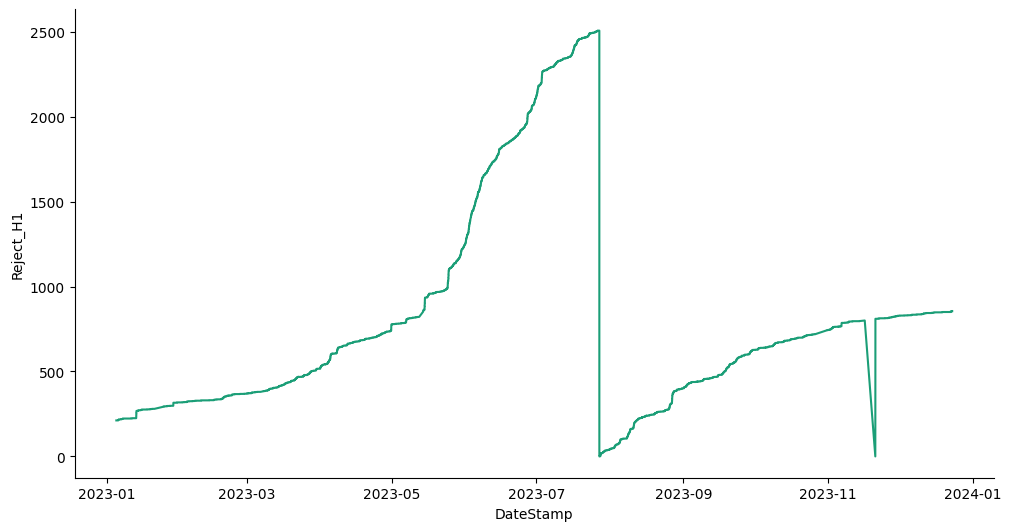

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['Reject_H1']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = functional_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('Reject_H1')

The graph indicates that data counters were reset between July and August 2023 and again between November 2023 and December 2023.

Therefore the dataset will be reduced to values between 1st January 2023 and 27th July 2023

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame and 'DateStamp' column contains timestamps

# Convert 'DateStamp' to datetime if it's not already
df['DateStamp'] = pd.to_datetime(df['DateStamp'])

# Filter DataFrame to include only rows where 'DateStamp' is earlier than or equal to 1st August 2023
filtered_df = df.loc[df['DateStamp'] <= '2023-07-27']

# Specify columns to keep in the new DataFrame
columns_to_keep = ['ID', 'DateStamp', 'ProductProg', 'Reject_H1', 'Reject_H2', 'Reject_H3', 'Reject_H4', 'Reject_H5', 'Reject_H6', 'Reject_H7', 'Reject_H8']

# Create new DataFrame with only the specified columns
functional_rejects = filtered_df[columns_to_keep]

# Print the new DataFrame
functional_rejects


,ID,DateStamp,ProductProg,Reject_H1,Reject_H2,Reject_H3,Reject_H4,Reject_H5,Reject_H6,Reject_H7,Reject_H8
0,3181924,2023-01-04 22:49:04.483,20561,212,215,328,98,211,182,263,443
1,3181925,2023-01-04 22:49:34.180,20561,212,215,328,98,211,182,263,443
2,3181926,2023-01-04 22:50:07.623,20561,212,215,328,98,211,182,263,443
3,3181927,2023-01-04 22:50:44.373,20561,212,215,328,98,211,183,263,443
4,3181928,2023-01-04 22:51:14.707,20561,212,215,328,98,211,183,263,443
...,...,...,...,...,...,...,...,...,...,...,...
378558,3560615,2023-07-26 23:57:50.423,18253,2506,1457,2746,1312,2339,1121,1463,1456
378559,3560616,2023-07-26 23:58:20.763,18253,2506,1457,2746,1312,2339,1121,1463,1456
378560,3560617,2023-07-26 23:58:49.977,18253,2506,1457,2746,1312,2339,1121,1463,1456
378561,3560618,2023-07-26 23:59:19.803,18253,2506,1457,2746,1312,2339,1121,1463,1456


from matplotlib import pyplot as plt
functional_rejects['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['Reject_H1'].plot(kind='hist', bins=20, title='Reject_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['Reject_H2'].plot(kind='hist', bins=20, title='Reject_H2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects.plot(kind='scatter', x='ID', y='ProductProg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects.plot(kind='scatter', x='ProductProg', y='Reject_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects.plot(kind='scatter', x='Reject_H1', y='Reject_H2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects.plot(kind='scatter', x='Reject_H2', y='Reject_H3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['ProductProg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = functional_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('ProductProg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['Reject_H1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = functional_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('Reject_H1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['Reject_H2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = functional_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('Reject_H2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['Reject_H3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = functional_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('Reject_H3')

from matplotlib import pyplot as plt
functional_rejects['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['ProductProg'].plot(kind='line', figsize=(8, 4), title='ProductProg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['Reject_H1'].plot(kind='line', figsize=(8, 4), title='Reject_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
functional_rejects['Reject_H2'].plot(kind='line', figsize=(8, 4), title='Reject_H2')
plt.gca().spines[['top', 'right']].set_visible(False)

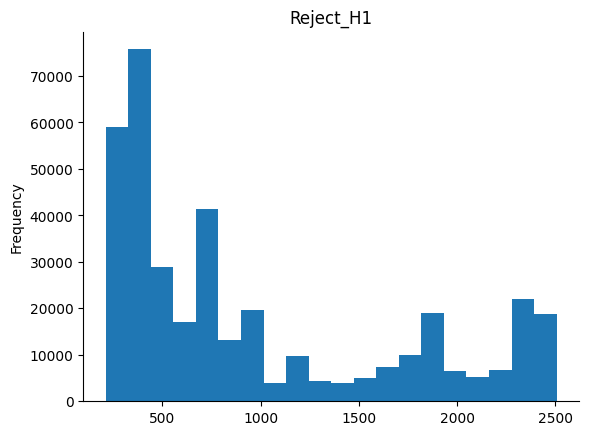

In [ ]:
from matplotlib import pyplot as plt
functional_rejects['Reject_H1'].plot(kind='hist', bins=20, title='Reject_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

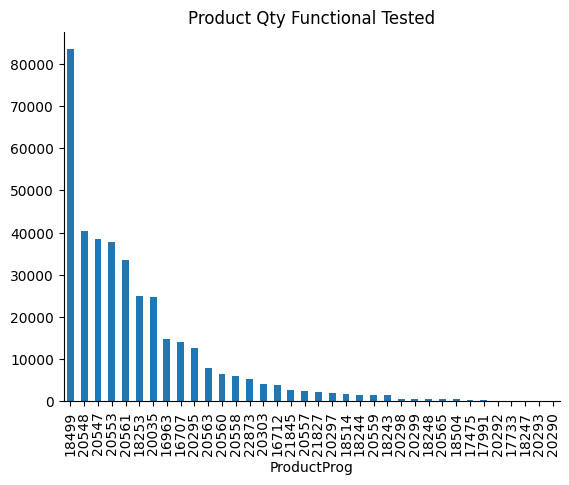

In [ ]:
#Show the quantity of each product

from matplotlib import pyplot as plt

# Count occurrences of each distinct value in the 'ProductProg' column
product_prog_counts = functional_rejects['ProductProg'].value_counts()

# Plotting the bar chart
product_prog_counts.plot(kind='bar', title='Product Qty Functional Tested')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

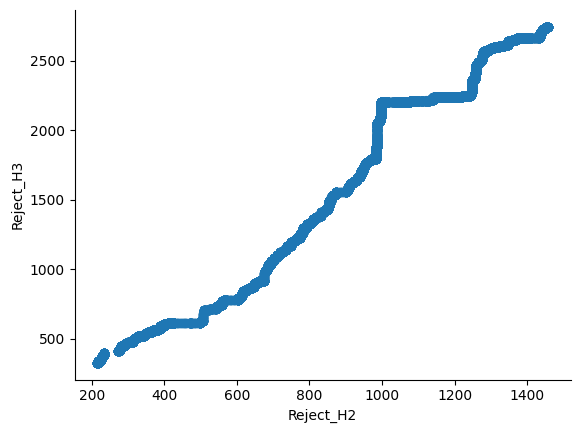

In [ ]:
from matplotlib import pyplot as plt
functional_rejects.plot(kind='scatter', x='Reject_H2', y='Reject_H3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The reject quantity increased significantly in June 2023 when compared to previous months

Present the data per month

In [ ]:

# Extract month from 'DateStamp'
functional_rejects.loc[:, 'DateStamp'] = df['DateStamp'].dt.month

# Group by month and count records
records_per_month = functional_rejects.groupby('DateStamp').size()

records_per_month


DateStamp
1    46771
2    56744
3    53376
4    54686
5    57630
6    59843
7    48700
dtype: int64

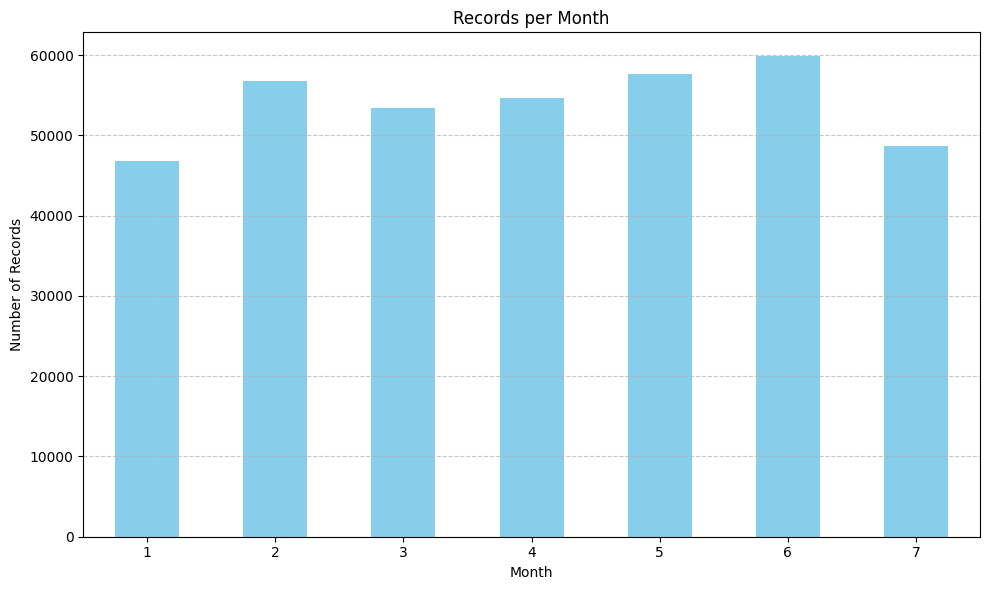

In [ ]:
# Group by month and count records
records_per_month = functional_rejects.groupby('DateStamp').size()

# Plotting
plt.figure(figsize=(10, 6))
records_per_month.plot(kind='bar', color='skyblue')
plt.title('Records per Month')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A consistent volume of products were made per month. This indicates a steady state production environment.

In [ ]:
functional_description = functional_rejects.describe()

#print the description

print(functional_description)

                 ID      DateStamp    ProductProg      Reject_H1  \
count  3.777500e+05  377750.000000  377750.000000  377750.000000   
mean   3.371283e+06       4.042989   19585.785099     968.802997   
std    1.093338e+05       1.949664    1327.321329     732.313308   
min    3.181924e+06       1.000000   16707.000000     212.000000   
25%    3.276570e+06       2.000000   18499.000000     367.000000   
50%    3.371332e+06       4.000000   20303.000000     685.000000   
75%    3.465962e+06       6.000000   20553.000000    1622.000000   
max    3.560619e+06       7.000000   22873.000000    2506.000000   

           Reject_H2      Reject_H3      Reject_H4      Reject_H5  \
count  377750.000000  377750.000000  377750.000000  377750.000000   
mean      840.507097    1538.550886     727.517895    1071.868339   
std       425.663871     885.756233     400.231428     717.794314   
min       215.000000     328.000000      98.000000     211.000000   
25%       356.000000     546.000000     28

Head 3 had the highest mean reject count (1538) over the period of time.

Head 2 had the lowest mean reject count (682) over the period of time.





Count the number of records in the dataframe per test head Reject_H3 by subtracting the first record from the latest record

In [ ]:
# Convert 'DateStamp' column to datetime using .loc
functional_rejects.loc[:, 'DateStamp'] = pd.to_datetime(functional_rejects['DateStamp'])

# Find the oldest and latest dates
oldest_date = functional_rejects['DateStamp'].min()
latest_date = functional_rejects['DateStamp'].max()

# Find the corresponding values for the oldest and latest dates
oldest_value = functional_rejects.loc[functional_rejects['DateStamp'] == oldest_date, 'Reject_H3'].iloc[0]
latest_value = functional_rejects.loc[functional_rejects['DateStamp'] == latest_date, 'Reject_H3'].iloc[0]

# Subtract the oldest value from the latest value
difference = latest_value - oldest_value

print("Oldest Value:", oldest_value)
print("Latest Value:", latest_value)
print("Difference:", difference)

Oldest Value: 328
Latest Value: 2642
Difference: 2314


In [ ]:
# Count the number of rows in the DataFrame
num_rows = functional_rejects.count()

print("Number of rows in the DataFrame:", num_rows)


Number of rows in the DataFrame: ID             377750
DateStamp      377750
ProductProg    377750
Reject_H1      377750
Reject_H2      377750
Reject_H3      377750
Reject_H4      377750
Reject_H5      377750
Reject_H6      377750
Reject_H7      377750
Reject_H8      377750
dtype: int64


Graph the part number against made per month.

In [ ]:
# Group by 'PartNumber' and 'Month', and count records
records_per_part_per_month = functional_rejects.groupby(['ProductProg', 'DateStamp']).size().reset_index(name='Records')

records_per_part_per_month

,ProductProg,DateStamp,Records
0,16707,1970-01-01 00:00:00.000000001,1561
1,16707,1970-01-01 00:00:00.000000002,2925
2,16707,1970-01-01 00:00:00.000000003,1481
3,16707,1970-01-01 00:00:00.000000004,878
4,16707,1970-01-01 00:00:00.000000005,2292
...,...,...,...
147,22873,1970-01-01 00:00:00.000000003,307
148,22873,1970-01-01 00:00:00.000000004,895
149,22873,1970-01-01 00:00:00.000000005,1478
150,22873,1970-01-01 00:00:00.000000006,335


from matplotlib import pyplot as plt
records_per_part_per_month['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
records_per_part_per_month['Records'].plot(kind='hist', bins=20, title='Records')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
records_per_part_per_month.plot(kind='scatter', x='ProductProg', y='Records', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['Records']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = records_per_part_per_month.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('Records')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DateStamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DateStamp'}, axis=1)
              .sort_values('DateStamp', ascending=True))
  xs = counted['DateStamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = records_per_part_per_month.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ProductProg']
  ys = series['Records']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = records_per_part_per_month.sort_values('ProductProg', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ProductProg')
_ = plt.ylabel('Records')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ProductProg']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ProductProg'}, axis=1)
              .sort_values('ProductProg', ascending=True))
  xs = counted['ProductProg']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = records_per_part_per_month.sort_values('ProductProg', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ProductProg')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
records_per_part_per_month['ProductProg'].plot(kind='line', figsize=(8, 4), title='ProductProg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
records_per_part_per_month['Records'].plot(kind='line', figsize=(8, 4), title='Records')
plt.gca().spines[['top', 'right']].set_visible(False)

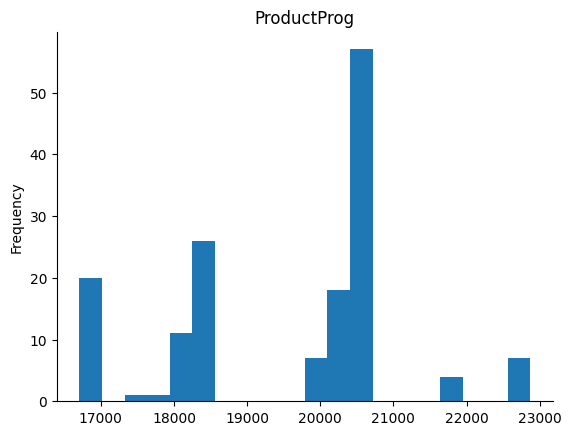

In [ ]:
from matplotlib import pyplot as plt
records_per_part_per_month['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Noise Rejects**

Create a dataframe for noise rejects Create a graphical illustration of the data.




In [ ]:
#Create new dataframe with only noise reject counters

noise_columns_to_keep = [ 'ID', 'DateStamp','ProductProg','NoiseReject_H1', 'NoiseReject_H2', 'NoiseReject_H3', 'NoiseReject_H4', 'NoiseReject_H5', 'NoiseReject_H6', 'NoiseReject_H7', 'NoiseReject_H8']

noise_rejects = df.loc[:, noise_columns_to_keep]

#print the new dataframe

noise_rejects

,ID,DateStamp,ProductProg,NoiseReject_H1,NoiseReject_H2,NoiseReject_H3,NoiseReject_H4,NoiseReject_H5,NoiseReject_H6,NoiseReject_H7,NoiseReject_H8
0,3181924,2023-01-04 22:49:04.483,20561,347,1786,207,1765,2048,106,233,804
1,3181925,2023-01-04 22:49:34.180,20561,347,1786,207,1765,2048,106,233,804
2,3181926,2023-01-04 22:50:07.623,20561,347,1786,207,1765,2048,106,233,804
3,3181927,2023-01-04 22:50:44.373,20561,347,1786,207,1765,2048,106,233,804
4,3181928,2023-01-04 22:51:14.707,20561,347,1786,207,1765,2048,106,233,804
...,...,...,...,...,...,...,...,...,...,...,...
631392,3814085,2023-12-23 06:19:04.900,18499,10404,3005,11300,975,8118,9070,4137,4899
631393,3814086,2023-12-23 06:19:40.327,18499,10404,3005,11300,975,8118,9070,4137,4899
631394,3814087,2023-12-23 06:20:16.253,18499,10404,3005,11300,975,8118,9070,4137,4899
631395,3814088,2023-12-23 06:20:48.127,18499,10404,3005,11300,975,8118,9070,4137,4899


from matplotlib import pyplot as plt
noise_rejects['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H1'].plot(kind='hist', bins=20, title='NoiseReject_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H2'].plot(kind='hist', bins=20, title='NoiseReject_H2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='ID', y='ProductProg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='ProductProg', y='NoiseReject_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H1', y='NoiseReject_H2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H2', y='NoiseReject_H3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['ProductProg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('ProductProg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['NoiseReject_H1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('NoiseReject_H1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['NoiseReject_H2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('NoiseReject_H2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['NoiseReject_H3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('NoiseReject_H3')

from matplotlib import pyplot as plt
noise_rejects['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['ProductProg'].plot(kind='line', figsize=(8, 4), title='ProductProg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H1'].plot(kind='line', figsize=(8, 4), title='NoiseReject_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H2'].plot(kind='line', figsize=(8, 4), title='NoiseReject_H2')
plt.gca().spines[['top', 'right']].set_visible(False)

Reduce the dataset to the same date range as functional rejects

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame and 'DateStamp' column contains timestamps

# Convert 'DateStamp' to datetime if it's not already
noise_rejects['DateStamp'] = pd.to_datetime(noise_rejects['DateStamp'])

# Filter DataFrame to include only rows where 'DateStamp' is earlier than or equal to 1st August 2023
filtered_noise_rejects = noise_rejects.loc[noise_rejects['DateStamp'] <= '2023-07-27']

# Specify columns to keep in the new DataFrame
columns_to_keep = [ 'ID', 'DateStamp', 'ProductProg','NoiseReject_H1', 'NoiseReject_H2', 'NoiseReject_H3', 'NoiseReject_H4', 'NoiseReject_H5', 'NoiseReject_H6', 'NoiseReject_H7', 'NoiseReject_H8']

# Create new DataFrame with only the specified columns
noise_rejects = filtered_noise_rejects[columns_to_keep]

# Print the new DataFrame
noise_rejects

,ID,DateStamp,ProductProg,NoiseReject_H1,NoiseReject_H2,NoiseReject_H3,NoiseReject_H4,NoiseReject_H5,NoiseReject_H6,NoiseReject_H7,NoiseReject_H8
0,3181924,2023-01-04 22:49:04.483,20561,347,1786,207,1765,2048,106,233,804
1,3181925,2023-01-04 22:49:34.180,20561,347,1786,207,1765,2048,106,233,804
2,3181926,2023-01-04 22:50:07.623,20561,347,1786,207,1765,2048,106,233,804
3,3181927,2023-01-04 22:50:44.373,20561,347,1786,207,1765,2048,106,233,804
4,3181928,2023-01-04 22:51:14.707,20561,347,1786,207,1765,2048,106,233,804
...,...,...,...,...,...,...,...,...,...,...,...
378558,3560615,2023-07-26 23:57:50.423,18253,9879,17346,12596,3626,9393,10241,3473,13207
378559,3560616,2023-07-26 23:58:20.763,18253,9879,17346,12597,3626,9393,10241,3473,13207
378560,3560617,2023-07-26 23:58:49.977,18253,9879,17346,12597,3626,9393,10241,3473,13207
378561,3560618,2023-07-26 23:59:19.803,18253,9879,17346,12597,3626,9393,10241,3473,13207


from matplotlib import pyplot as plt
noise_rejects['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H1'].plot(kind='hist', bins=20, title='NoiseReject_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H2'].plot(kind='hist', bins=20, title='NoiseReject_H2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='ID', y='ProductProg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='ProductProg', y='NoiseReject_H1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H1', y='NoiseReject_H2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H2', y='NoiseReject_H3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DateStamp']
  ys = series['ProductProg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('ProductProg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DateStamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DateStamp'}, axis=1)
              .sort_values('DateStamp', ascending=True))
  xs = counted['DateStamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('DateStamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DateStamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['ProductProg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('ProductProg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = noise_rejects.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
noise_rejects['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['ProductProg'].plot(kind='line', figsize=(8, 4), title='ProductProg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H1'].plot(kind='line', figsize=(8, 4), title='NoiseReject_H1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H2'].plot(kind='line', figsize=(8, 4), title='NoiseReject_H2')
plt.gca().spines[['top', 'right']].set_visible(False)

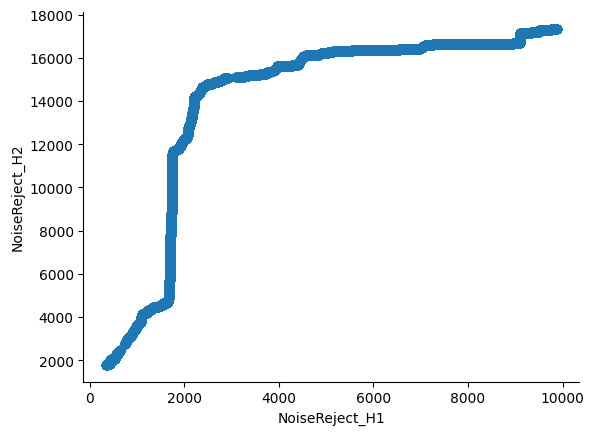

In [ ]:
from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H1', y='NoiseReject_H2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

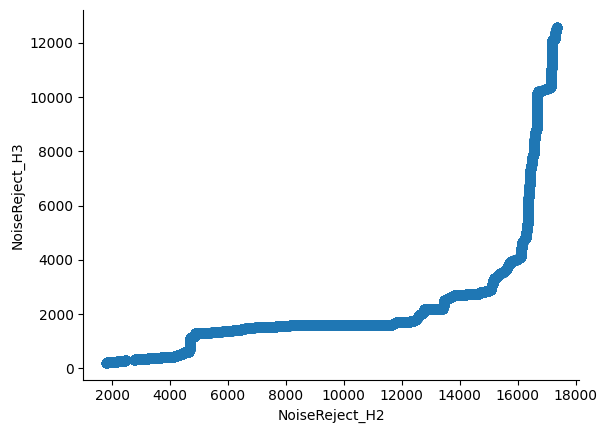

In [ ]:
from matplotlib import pyplot as plt
noise_rejects.plot(kind='scatter', x='NoiseReject_H2', y='NoiseReject_H3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

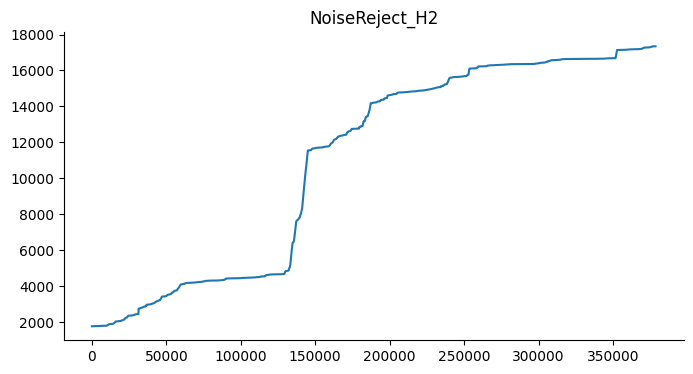

In [ ]:
from matplotlib import pyplot as plt
noise_rejects['NoiseReject_H2'].plot(kind='line', figsize=(8, 4), title='NoiseReject_H2')
plt.gca().spines[['top', 'right']].set_visible(False)

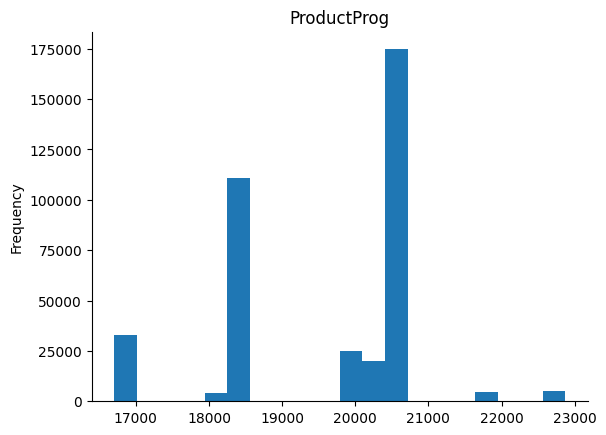

In [ ]:
from matplotlib import pyplot as plt
noise_rejects['ProductProg'].plot(kind='hist', bins=20, title='ProductProg')
plt.gca().spines[['top', 'right',]].set_visible(False)

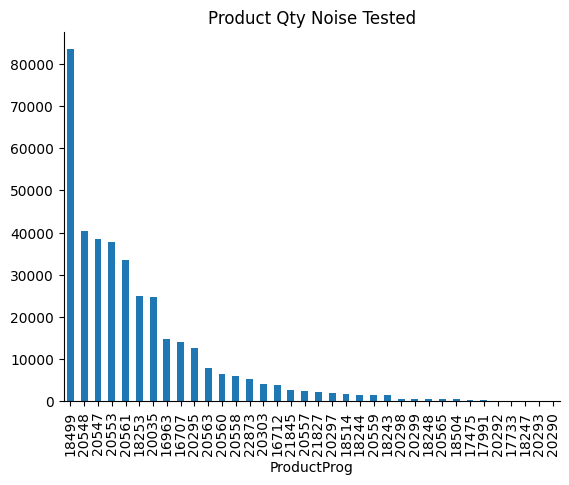

In [ ]:
#Show the quantity of each product

from matplotlib import pyplot as plt

# Count occurrences of each distinct value in the 'ProductProg' column
product_prog_counts = noise_rejects['ProductProg'].value_counts()

# Plotting the bar chart
product_prog_counts.plot(kind='bar', title='Product Qty Noise Tested')

# Removing the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

Product 18499 produced the most on the station during the dataset time range.





In [ ]:

# Assuming 'ProductProg' is the column containing product values
product_value = '18499'

# Filter DataFrame based on the specified product value
filtered_df = noise_rejects[noise_rejects['ProductProg'] == product_value]

# Count the number of rows in the filtered DataFrame
num_rows = filtered_df.shape[0]  # shape[0] gives the number of rows

print("Number of rows in the DataFrame where 'ProductProg' equals '{}': {}".format(product_value, num_rows))



Number of rows in the DataFrame where 'ProductProg' equals '18499': 0


In [ ]:
noise_description = noise_rejects.describe()

#print the description

print(noise_description)

                 ID                      DateStamp    ProductProg  \
count  3.777500e+05                         377750  377750.000000   
mean   3.371283e+06  2023-04-17 17:44:56.194618624   19585.785099   
min    3.181924e+06     2023-01-04 22:49:04.483000   16707.000000   
25%    3.276570e+06  2023-02-24 13:02:22.684749824   18499.000000   
50%    3.371332e+06  2023-04-19 01:04:37.526499840   20303.000000   
75%    3.465962e+06  2023-06-07 22:17:36.867749888   20553.000000   
max    3.560619e+06     2023-07-26 23:59:29.003000   22873.000000   
std    1.093338e+05                            NaN    1327.321329   

       NoiseReject_H1  NoiseReject_H2  NoiseReject_H3  NoiseReject_H4  \
count   377750.000000   377750.000000   377750.000000   377750.000000   
mean      3600.046584    11017.573869     3613.931833     2788.184127   
min        347.000000     1786.000000      207.000000     1765.000000   
25%       1376.000000     4452.000000      549.000000     2068.000000   
50%       225

Head 2 had the highest mean reject count (11017) over the period of time.

Head 7 had the lowest mean reject count (1661) over the period of time.


**Head Feature Analysis**

Going to check Boolean feature data against the functional rejects for Head 1

In [ ]:
#Create new dataframe with functional reject counters for Head 1 + Boolean feature data

functional_columns_to_keep_H1 = ['DateStamp', 'ProductProg','MotorEngagementOK_L_H1', 'MotorEngagementOK_R_H1', 'MotorContactOK_L_H1', 'MotorContactOK_R_H1', 'GearEngagementOK_L_H1', 'GearEngagementOK_R_H1', 'NoiseOK_H1', 'Result_H1','Reject_H1']

functional_rejects_H1 = df.loc[:, functional_columns_to_keep_H1]

#print the new dataframe

functional_rejects_H1

,DateStamp,ProductProg,MotorEngagementOK_L_H1,MotorEngagementOK_R_H1,MotorContactOK_L_H1,MotorContactOK_R_H1,GearEngagementOK_L_H1,GearEngagementOK_R_H1,NoiseOK_H1,Result_H1,Reject_H1
0,2023-01-04 22:49:04.483,20561,0,0,0,0,0,0,1,0,212
1,2023-01-04 22:49:34.180,20561,0,0,0,0,0,0,1,0,212
2,2023-01-04 22:50:07.623,20561,0,0,0,0,0,0,1,0,212
3,2023-01-04 22:50:44.373,20561,0,0,0,0,0,0,1,0,212
4,2023-01-04 22:51:14.707,20561,0,0,0,0,0,0,1,0,212
...,...,...,...,...,...,...,...,...,...,...,...
631392,2023-12-23 06:19:04.900,18499,0,0,0,0,0,0,1,0,855
631393,2023-12-23 06:19:40.327,18499,0,0,0,0,0,0,1,0,855
631394,2023-12-23 06:20:16.253,18499,0,0,0,0,0,0,1,0,855
631395,2023-12-23 06:20:48.127,18499,0,0,0,0,0,0,1,0,855


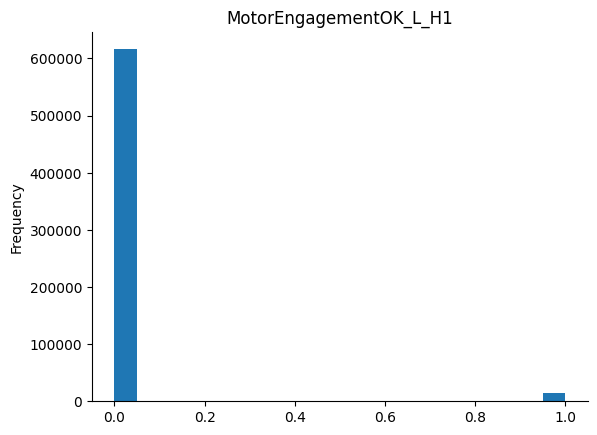

In [ ]:
from matplotlib import pyplot as plt
functional_rejects_H1['MotorEngagementOK_L_H1'].plot(kind='hist', bins=20, title='MotorEngagementOK_L_H1')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
functional_rejects_H1_description = functional_rejects_H1.describe()

#print the description

print(functional_rejects_H1_description )

                           DateStamp    ProductProg  MotorEngagementOK_L_H1  \
count                         630297  630297.000000           630297.000000   
mean   2023-06-26 10:00:58.233327360   19694.449155                0.022632   
min       2023-01-04 22:49:04.483000   16707.000000                0.000000   
25%       2023-04-01 08:52:09.480000   18499.000000                0.000000   
50%    2023-06-24 03:49:21.056999936   20547.000000                0.000000   
75%    2023-09-19 10:34:14.447000064   20553.000000                0.000000   
max       2023-12-23 06:21:23.917000   22873.000000                1.000000   
std                              NaN    1293.373128                0.148728   

       MotorEngagementOK_R_H1  MotorContactOK_L_H1  MotorContactOK_R_H1  \
count           630297.000000        630297.000000        630297.000000   
mean                 0.023403             0.020043             0.020678   
min                  0.000000             0.000000             

No discernable pattern or trend data could be identified from the features in the dataframe.